45222
<class 'numpy.ndarray'>
[[   0.    0.    0. ...   40.    0. 2174.]
 [   0.    0.    0. ...   13.    0.    0.]
 [   0.    0.    0. ...   40.    0.    0.]
 ...
 [   0.    0.    0. ...   50.    0.    0.]
 [   0.    0.    0. ...   40.    0. 5455.]
 [   0.    0.    0. ...   60.    0.    0.]]
(5000, 191) (5000,)
191 0.856


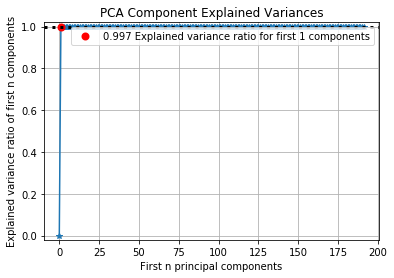

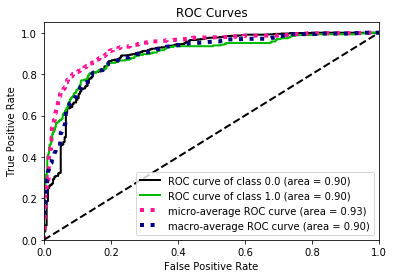

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
import scikitplot as skplt

df = pd.read_csv('census2.csv')
# df.head(10)
oh = OneHotEncoder()

# oh.fit([['a',1],['b',0]])
# a = oh.transform([['b',1]]).toarray()
# print(a)
print(len(df))
oh.fit(df.iloc[:,:-4])
b = oh.transform(df.iloc[:,:-4]).toarray()

oh.fit(df)
a = oh.transform(df).toarray()
print(type(a))

b = np.hstack((b,df.iloc[:,-4:-1].values))
print(b)

pca  = PCA()
pca.fit(b)
skplt.decomposition.plot_pca_component_variance(pca)


X = b[:5000,:]
y = a[:5000,-1]
print(X.shape, y.shape)
y_train, y_test, x_train, x_test = train_test_split(y, X, test_size=0.2)
    

gm = i/10
#     model = SVC(gamma = gm)
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     print(gm, accuracy_score(y_test,y_pred))

model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=i)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(i, accuracy_score(y_test,y_pred))
# skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize=True)

y_prob = model.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,y_prob)

In [3]:
a = [[1,2],
    [3,4]]
b = [[3],[5]]
a+b

[[1, 2], [3, 4], [3], [5]]